In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#for post model training visualzations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
data_cleaned = pd.read_csv('../../cleaned_dataset.csv')

In [6]:
# Define features and target
X = data_cleaned[['NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']]
y = data_cleaned['Overall AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scalar
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# LinearRegression fit
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make a prediction
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
lr_mse = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error (MSE) of Linear Regression: {lr_mse:.4f}")
print(f"R-Squared (R^2) of Linear Regression: {lr_r2:.4f}")

Mean Squared Error (MSE) of Linear Regression: 5.2664
R-Squared (R^2) of Linear Regression: 0.8709


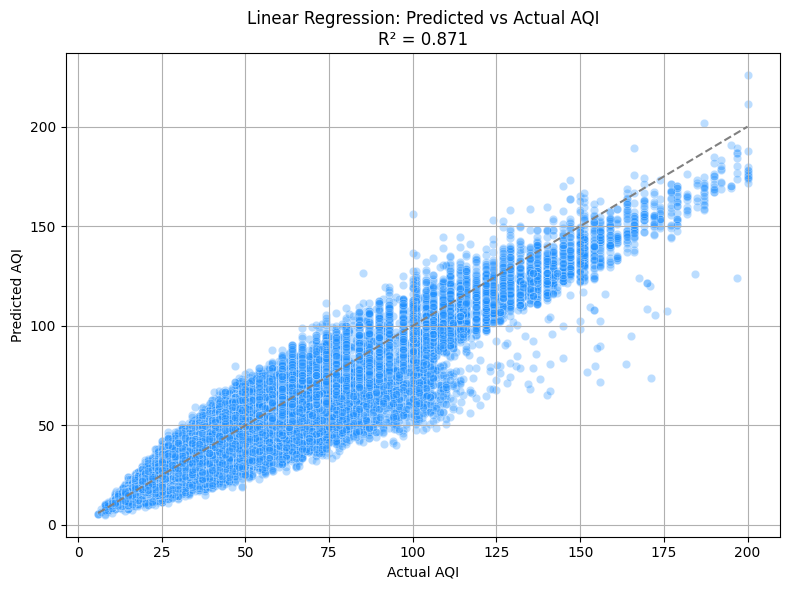

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.3, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title(f"Linear Regression: Predicted vs Actual AQI\nR² = {lr_r2:.3f}")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Ivan\AppData\Local\Temp\ipykernel_12980\2673228628.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')


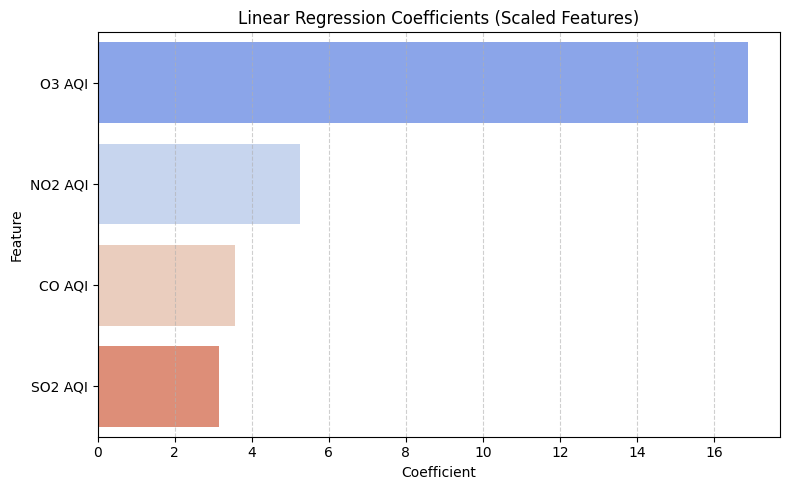

In [8]:
coefficients = lr_model.coef_
feature_names = X.columns

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Linear Regression Coefficients (Scaled Features)")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [9]:
# Random Forest Regressor
forest_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=4, min_samples_split=20)

# Train model
forest_model.fit(X_train, y_train)

# Make a prediction
y_pred_forest = forest_model.predict(X_test)

# Evaluate
forest_mse = mean_squared_error(y_test, y_pred_forest)
forest_r2 = r2_score(y_test, y_pred_forest)

print(f"Mean Squared Error (MSE) of Random Forest Regressor: {forest_mse:.4f}")
print(f"R^2 Score (R^2) of Random Forest Regressor: {forest_r2:.4f}")

Mean Squared Error (MSE) of Random Forest Regressor: 36.8555
R^2 Score (R^2) of Random Forest Regressor: 0.9089


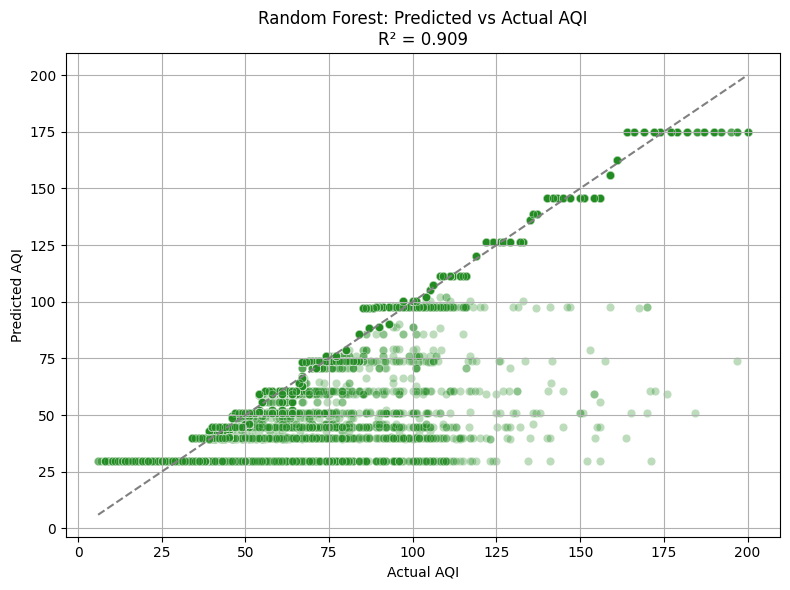

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_forest, alpha=0.3, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title(f"Random Forest: Predicted vs Actual AQI\nR² = {forest_r2:.3f}")
plt.grid(True)
plt.tight_layout()
plt.show()


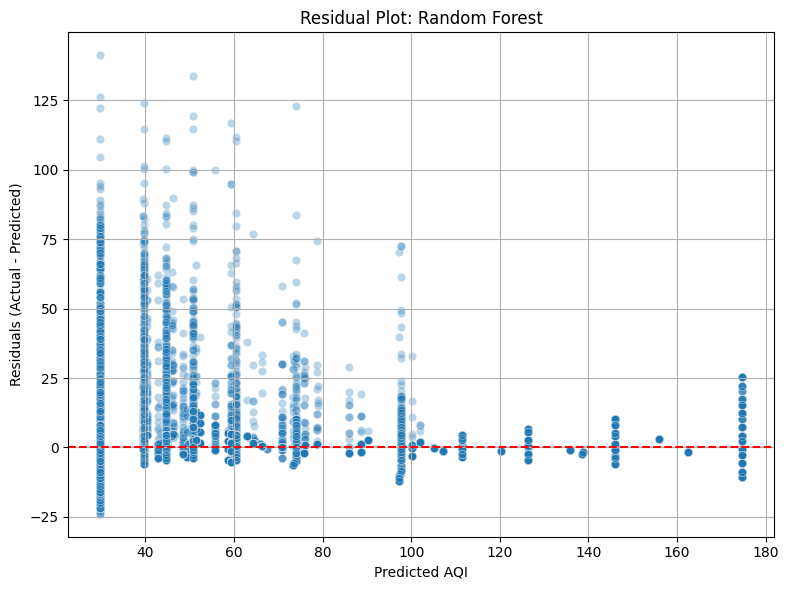

In [11]:
residuals_rf = y_test - y_pred_forest

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_forest, y=residuals_rf, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted AQI")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot: Random Forest")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Ivan\AppData\Local\Temp\ipykernel_12980\3857973090.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x='Importance', y='Feature', palette='Greens')


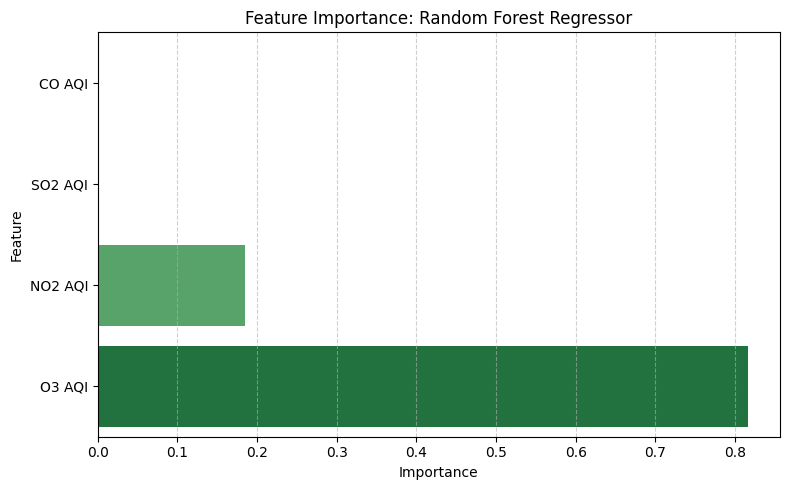

In [12]:
importances = forest_model.feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8, 5))
sns.barplot(data=feat_df, x='Importance', y='Feature', palette='Greens')
plt.title("Feature Importance: Random Forest Regressor")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [13]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0, fit_intercept=True, solver='auto')

# Train model
ridge_model.fit(X_train, y_train)

# Make a prediction
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print(f"Mean Squared Error (MSE) of Ridge Regression: {ridge_mse:.4f}")
print(f"R^2 Score (R^2) of Ridge Regression: {ridge_r2:.4f}")


Mean Squared Error (MSE) of Ridge Regression: 52.2295
R^2 Score (R^2) of Ridge Regression: 0.8709


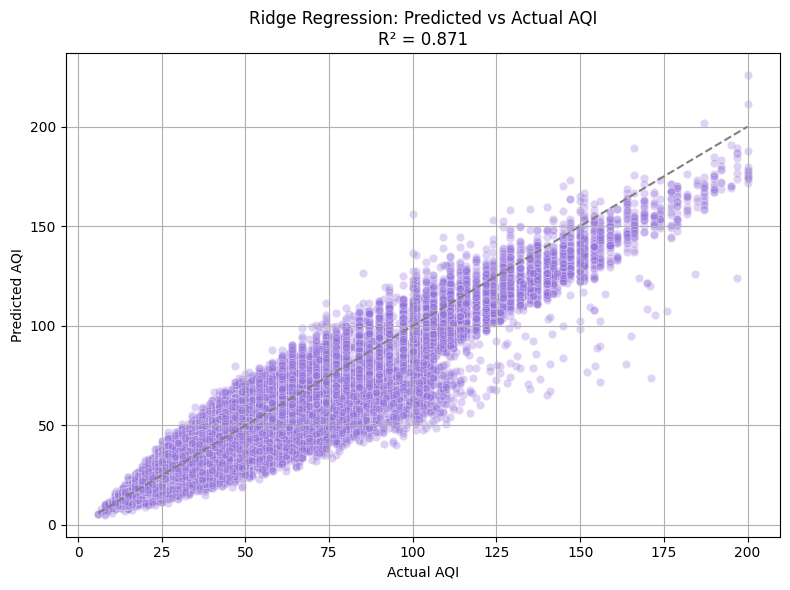

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.3, color='mediumpurple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title(f"Ridge Regression: Predicted vs Actual AQI\nR² = {ridge_r2:.3f}")
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
# Gradicent Boosting Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Fit model
xgb_model.fit(X_train_scaled, y_train)

# Make a prediction
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print(f"Mean Squared Error (MSE) of XGBoost Regressor: {xgb_mse:.4f}")
print(f"R^2 Score (R^2) of XGBoost Regressor: {xgb_r2:.4f}")

Mean Squared Error (MSE) of XGBoost Regressor: 2.5558
R^2 Score (R^2) of XGBoost Regressor: 0.9937


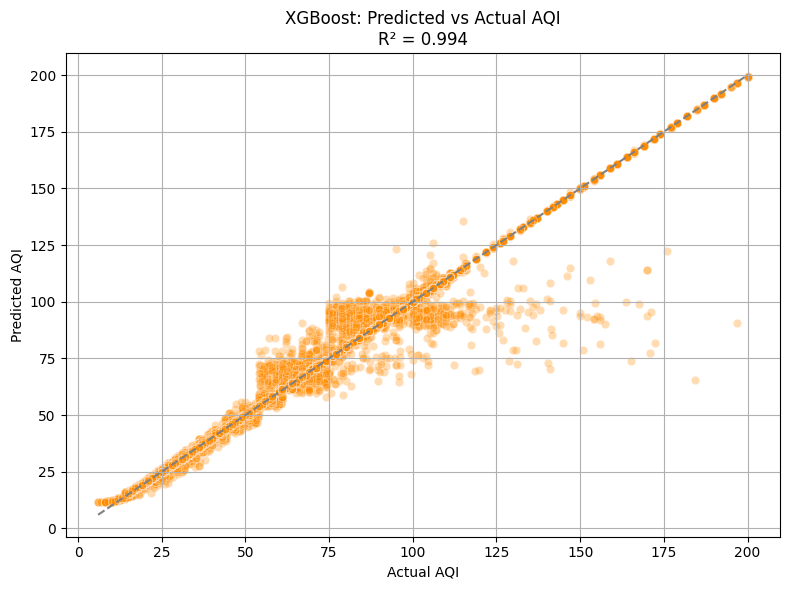

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.3, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title(f"XGBoost: Predicted vs Actual AQI\nR² = {xgb_r2:.3f}")
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
# Define the parameters grid for XGBoost
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Perform Grid Search with 5-fold cross-validation
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search
grid_search_xgb.fit(X_train_scaled, y_train.values.ravel())

# Print the best parameters and best score
print("Best parameters for XGBoost Regressor:", grid_search_xgb.best_params_)
print(f"Best score for XGBoost Regressor: {grid_search_xgb.best_score_:.4f}")

Best parameters for XGBoost Regressor: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best score for XGBoost Regressor: -2.2736


In [19]:
best_xgb_model = grid_search_xgb.best_estimator_

y_pred_best_xgb = best_xgb_model.predict(X_test_scaled)

best_xgb_mse = mean_squared_error(y_test, y_pred_best_xgb)
best_xgb_r2 = r2_score(y_test, y_pred_best_xgb)

print(f"Mean Squared Error (MSE) of Best XGBoost Regressor: {best_xgb_mse:.4f}")
print(f"R^2 Score (R^2) of Best XGBoost Regressor: {best_xgb_r2:.4f}")

Mean Squared Error (MSE) of Best XGBoost Regressor: 2.3270
R^2 Score (R^2) of Best XGBoost Regressor: 0.9942


In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.3, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title(f"XGBoost: Predicted vs Actual AQI\nR² = {xgb_r2:.3f}")
plt.grid(True)
plt.tight_layout()
plt.show()

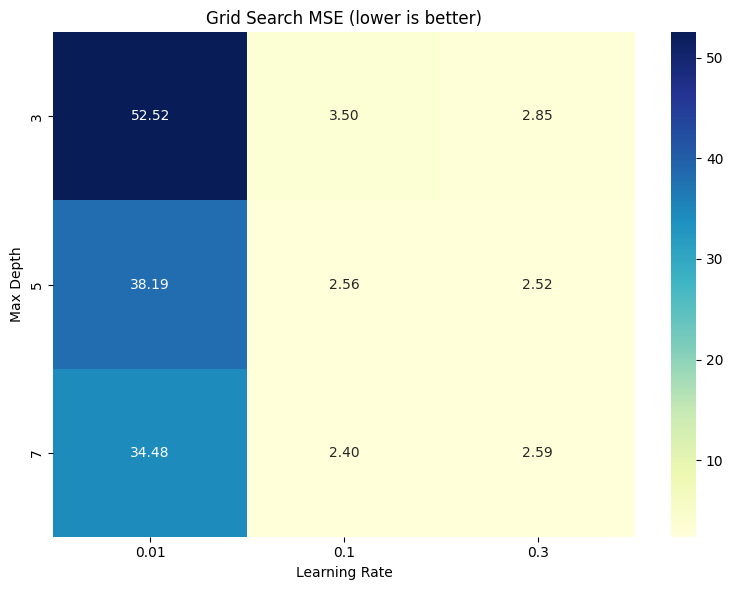

In [22]:
# Convert CV results to DataFrame
results_df = pd.DataFrame(grid_search_xgb.cv_results_)

# Filter only relevant columns
heatmap_data = results_df[
    ['param_max_depth', 'param_learning_rate', 'mean_test_score']
].copy()

# Convert negative MSE to positive
heatmap_data['mean_test_score'] = -heatmap_data['mean_test_score']

# Pivot table for heatmap
pivot_table = heatmap_data.pivot_table(
    index='param_max_depth',
    columns='param_learning_rate',
    values='mean_test_score'
)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Grid Search MSE (lower is better)")
plt.xlabel("Learning Rate")
plt.ylabel("Max Depth")
plt.tight_layout()